# Análisis de Riesgo de Crédito
## Introducción a Aplicaciones de Ciencia de Datos en Finanzas
### Trabajo final
**Profesor: Roccatagliata, Pablo**

**Alumnos:**
- Basabe, Paloma
- Mérida, Ezequiel    
- Parrotta, Agustin

#### Maestría en Finanzas
#### Universidad Torcuato Di Tella
#### Octubre de 2021


Nota: Este script se presenta a modo de referencia / apéndice al trabajo realizado. El mismo muestra el código de los modelos entrenados y los gráficos realizados.

## Dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [2]:
%matplotlib inline

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Análisis Exploratorio

En primer lugar, cargamos los datos y seleccionamos las columnas necesarias.

In [3]:
df = pd.read_csv('data/cs-training.csv')
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
print("Cantidad de registros:", len(df))

Cantidad de registros: 150000


### Variable SeriousDlqIn2yrs

Chequeamos cuán desbalanceados están los datos.

In [9]:
label = 'SeriousDlqin2yrs'
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
        'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
        'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

In [10]:
print("Porcentaje de personas que defaultearon: {:.3f} %".format(df[label].mean() *100))

Porcentaje de personas que defaultearon: 6.684 %


Saving figure 1_Desbalance


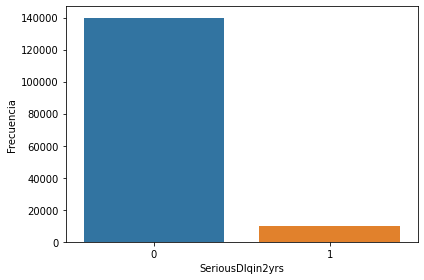

In [11]:
plt.figure()
plot = sns.countplot(x=label, data=df)
plot.set_ylabel('Frecuencia')
None
save_fig('1_Desbalance')

### Análisis General

#### Missing Values

In [12]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Observamos que solo presenta valores nulos las variables 'MonthlyIncome' y 'NumberOfDependents'.

In [13]:
print("Porcentaje de valores nulos de MonthlyIncome: {:.3f} %".format(df.MonthlyIncome.isnull().sum() * 100 / len(df)))
print("Porcentaje de valores nulos de NumberOfDependents: {:.3f} %".format(df.NumberOfDependents.isnull().sum() * 100 / len(df)))

Porcentaje de valores nulos de MonthlyIncome: 19.821 %
Porcentaje de valores nulos de NumberOfDependents: 2.616 %


Para 'MonthlyIncome', debido a que el número de valores nulos es elevado, no podemos borrar los registros. En cambio, deberíamos reemplazarlos por la media o mediana.

#### Correlación Lineal

Correlación con la variable target

In [14]:
# Observemos la correlación entre los predictores y el label
corr_matrix = df.corr()
corr_matrix[label].sort_values(ascending=False) 

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

Matriz de correlación

Saving figure 2-Correlacion


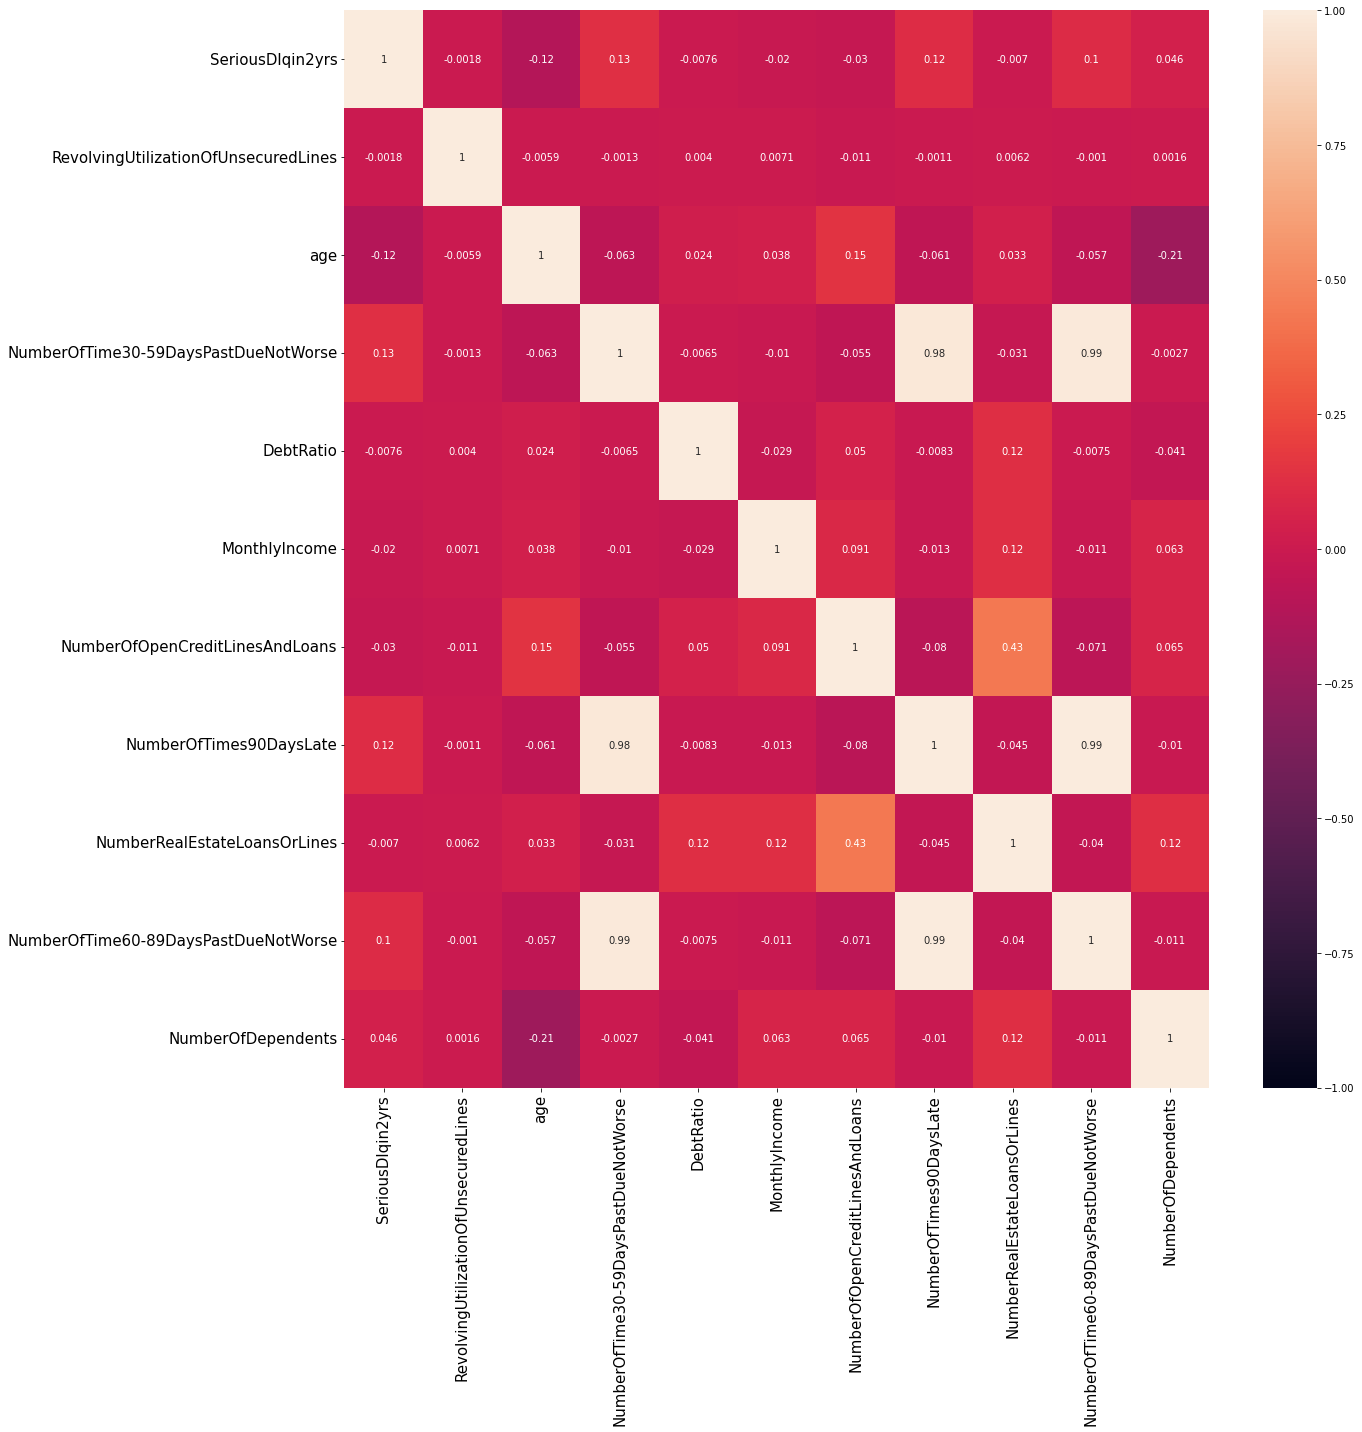

In [15]:
plt.figure(figsize=(20,20))
plot = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plot.set_xticklabels(plot.get_xticklabels(), size = 15)
plot.set_yticklabels(plot.get_yticklabels(), size = 15)
save_fig('2-Correlacion')

### Variable MonthlyIncome

In [16]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

c:\Users\agusp\python\environments\mfin\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome'>

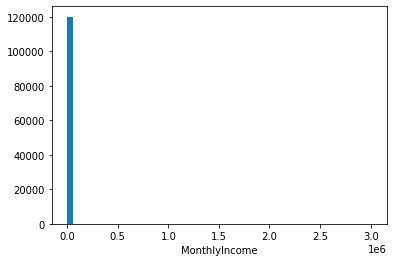

In [17]:
sns.distplot(df['MonthlyIncome'], kde=False, bins=50, hist_kws={"alpha": 1})

Saving figure 3-MonthlyIncome


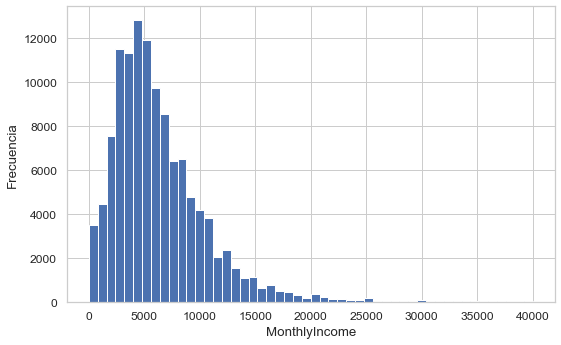

In [18]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
plot = sns.distplot(df['MonthlyIncome'], kde=False, bins=50, hist_kws={"alpha": 1, "range": [0,40000]})
plot.set(xlabel='MonthlyIncome', ylabel='Frecuencia')
save_fig('3-MonthlyIncome')

Observamos que la curva presenta una asimetría positiva. Dado esto, es conveniente utilizar la mediana en lugar de la media.

### Variable NumberOfDependents

Analicemos los datos para la variable 'NumberOfDependents'

In [19]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [20]:
df['NumberOfDependents'].quantile(0.995)

5.0

In [21]:
df['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

Saving figure 3-NumberOfDependents


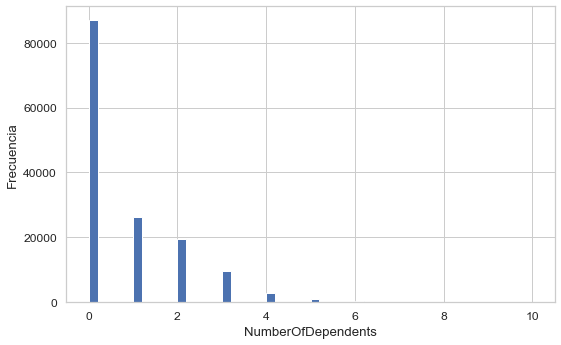

In [22]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
plot = sns.distplot(df['NumberOfDependents'], kde=False, hist_kws={"alpha": 1, "range": [0,10]})
plot.set(xlabel='NumberOfDependents', ylabel='Frecuencia')
save_fig('3-NumberOfDependents')

En este caso también se presenta una simetría positiva. Lo correcto sería reemplazar por su mediana. Debido a que los valores son discretos, reemplazaremos los valores nulos por su moda.

#### Variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse y NumberOfTimes90DaysLate

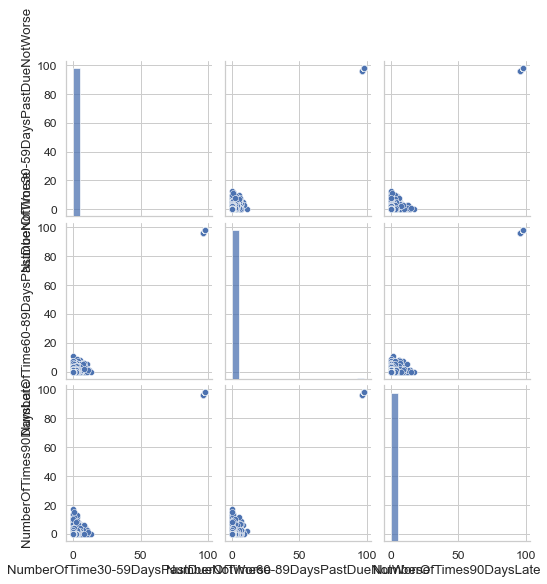

In [23]:
sns.pairplot(df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']])

In [24]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [25]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [26]:
df['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [27]:
df.loc[df['NumberOfTimes90DaysLate'] > 90][['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']]

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
1733,98,98,98
2286,98,98,98
3884,98,98,98
4417,98,98,98
4705,98,98,98
...,...,...,...
147774,98,98,98
149153,98,98,98
149239,98,98,98
149439,98,98,98


De los gráficos anteriores se observa la existencia de valores erróneos, ya que la mayoría de las observaciones se encuentran entre 0 y 20 aproximadamente, y existe una serie de observaciones en las que los valores son 96 y 98 para las tres variables, lo cual no tiene sentido.

In [28]:
df = df[df['NumberOfTimes90DaysLate'] < 95]

Volvemos a graficar la correlación

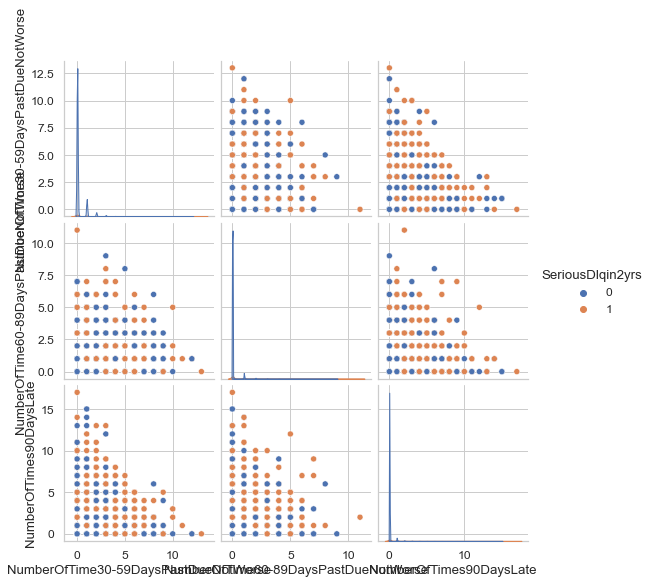

In [29]:
sns.pairplot(df[['SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']], hue='SeriousDlqin2yrs')

C:\Users\agusp\AppData\Local\Temp/ipykernel_15124/2943273281.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), size = 15)
C:\Users\agusp\AppData\Local\Temp/ipykernel_15124/2943273281.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(plot.get_yticklabels(), size = 15)


Saving figure 4-Correlacion2


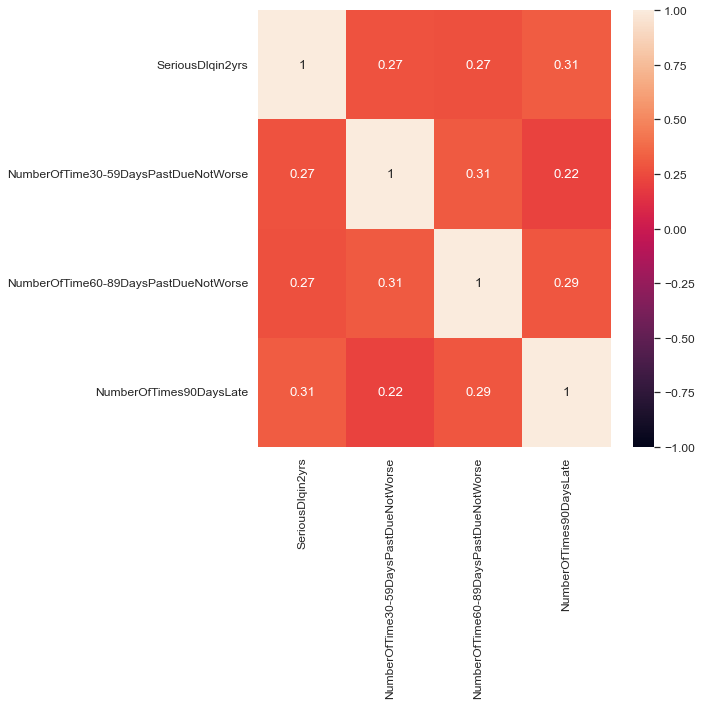

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']].corr(), vmin=-1, vmax=1, annot=True)
plot.set_xticklabels(plot.get_xticklabels(), size = 15)
plot.set_yticklabels(plot.get_yticklabels(), size = 15)
save_fig('4-Correlacion2')

#### Variable DebtRatio

In [31]:
df['DebtRatio'].describe()

count    149731.000000
mean        353.628957
std        2039.594737
min           0.000000
25%           0.175998
50%           0.367119
75%           0.870021
max      329664.000000
Name: DebtRatio, dtype: float64

In [32]:
df['DebtRatio'].quantile(0.9)

1270.0

In [33]:
df[df['DebtRatio'] > df['DebtRatio'].quantile(0.9)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,14971.00000,14971.000000,14971.000000,14971.000000,14971.000000,848.000000,14971.000000,14971.000000,14971.000000,14971.000000,13791.000000
mean,0.04983,10.351288,54.155367,0.237860,3120.386280,0.194575,9.454078,0.063456,1.563289,0.054706,0.485679
std,0.21760,297.791381,11.749298,0.704408,5726.134211,0.396107,4.877861,0.412053,1.033661,0.309523,0.976033
min,0.00000,0.000000,21.000000,0.000000,1271.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.029260,46.000000,0.000000,1807.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,0.00000,0.127806,54.000000,0.000000,2452.000000,0.000000,9.000000,0.000000,1.000000,0.000000,0.000000
75%,0.00000,0.454252,63.000000,0.000000,3492.000000,0.000000,12.000000,0.000000,2.000000,0.000000,1.000000
max,1.00000,22198.000000,109.000000,10.000000,329664.000000,1.000000,45.000000,11.000000,23.000000,9.000000,10.000000


Se observa que para valores donde DebtRatio > percentil95 solo existen 378 valores donde MonthlyIncome tiene valores no nulos, lo cual indica la posibilidad de un error en estos datos.

In [34]:
df[df['DebtRatio'] > df['DebtRatio'].quantile(0.9)][["MonthlyIncome"]].value_counts()

MonthlyIncome
0.0              683
1.0              165
dtype: int64

Se observa que la gran mayoría de datos se concentran entre 0 y 1.

In [35]:
# df = df[df['DebtRatio'] < df['DebtRatio'].quantile(0.9)]

(array([15961.,  5332.,  6191.,  6920.,  7643.,  8092.,  8138.,  8000.,
         7343.,  6707.,  5824.,  5124.,  4272.,  3470.,  2837.,  2391.,
         2125.,  1725.,  1425.,  1158.,   981.,   831.,   737.,   666.,
          500.,   675.,   379.,   338.,   276.,   262.,   248.,   211.,
          202.,   191.,   173.,   145.,   133.,   110.,   116.,    91.,
           86.,    75.,    86.,    71.,    45.,    66.,    44.,    48.,
           37.,   213.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 <BarContainer object of 50 artists>)

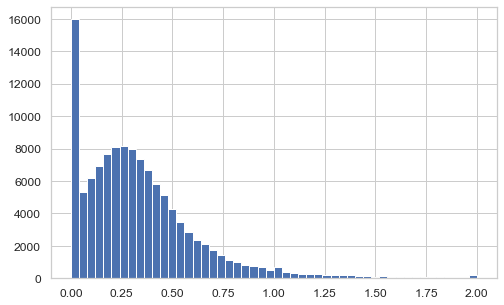

In [36]:
plt.hist(df['DebtRatio'], range=(0, 2), bins=50)

#### Variable RevolvingUtilizationOfUnsecuredLines

In [37]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149731.000000
mean          6.057508
std         249.979529
min           0.000000
25%           0.029771
50%           0.153491
75%           0.555601
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [38]:
df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)

1.0933417945000015

In [39]:
df[df['RevolvingUtilizationOfUnsecuredLines'] > df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1178.000000,1498.000000,1498.000000,1498.000000,1498.000000,1458.000000
mean,0.392523,574.651935,44.210948,0.930574,282.134303,5440.450764,5.772363,0.855140,0.608812,0.513351,0.860768
std,0.488475,2433.810208,12.992864,1.219629,1070.385835,5177.511769,3.908384,1.549358,0.952711,0.937682,1.160650
min,0.000000,1.093381,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.163673,34.000000,0.000000,0.155457,2614.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.368219,43.000000,1.000000,0.341395,4190.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.994574,53.000000,1.000000,1.077348,6500.000000,8.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,50708.000000,88.000000,7.000000,21395.000000,69520.000000,25.000000,15.000000,9.000000,7.000000,7.000000


Se observa que los valores de 'RevolvingUtilizationOfUnsecuredLines' por encima del quantil 99% presentan menor default que el resto de los datos, lo cual no tiene sentido. A mayor deuda y lineas de crédito, uno espera una mayor probabilidad de default. Por ende, se remueven estos outliers.

In [40]:
prob_default = []
for i in range(0, 1000, 1):
    output=df[df['RevolvingUtilizationOfUnsecuredLines'] > df['RevolvingUtilizationOfUnsecuredLines'].quantile(i/1000)][label].mean()
    prob_default.append((i/10, output*100))

In [41]:
# df = df[df['RevolvingUtilizationOfUnsecuredLines'] < df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)]

(array([4.3171e+04, 1.5897e+04, 9.7210e+03, 7.1550e+03, 5.7650e+03,
        4.8400e+03, 4.3500e+03, 3.9160e+03, 3.5170e+03, 3.2210e+03,
        3.0670e+03, 2.7980e+03, 2.5920e+03, 2.5410e+03, 2.2180e+03,
        2.1850e+03, 2.0900e+03, 2.0090e+03, 1.9000e+03, 1.9140e+03,
        1.9500e+03, 2.0090e+03, 2.2410e+03, 2.4340e+03, 1.2892e+04,
        1.2780e+03, 4.4700e+02, 2.9800e+02, 1.7900e+02, 9.8000e+01,
        9.4000e+01, 7.8000e+01, 7.0000e+01, 4.1000e+01, 4.5000e+01,
        4.2000e+01, 4.8000e+01, 3.3000e+01, 2.5000e+01, 2.5000e+01,
        2.3000e+01, 2.4000e+01, 2.1000e+01, 1.8000e+01, 1.1000e+01,
        1.6000e+01, 1.5000e+01, 1.1000e+01, 1.3000e+01, 1.4000e+01]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.

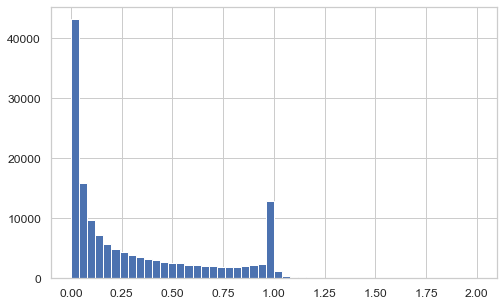

In [42]:
plt.hist(df['RevolvingUtilizationOfUnsecuredLines'], range=(0, 2), bins=50)

## Análisis ExploratorioDecisiones finales:
- MonthlyIncome: Reemplazar valores nulos por la mediana.
- NumberOfDependents: Reemplazar valores nulos por la moda (0).
- NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse y NumberOfTimes90DaysLate: remover outliers (ya realizado).
- DebtRatio: Eliminar el último 10% percentil.
- RevolvingUtilizationOfUnsecuredLines: Eliminar el último 1% percentil.

In [46]:
df = df.fillna(df.median())
df = df[df['DebtRatio'] < df['DebtRatio'].quantile(0.9)]
df = df[df['RevolvingUtilizationOfUnsecuredLines'] < df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)]


In [48]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,133406.000000,133406.000000,133406.000000,133406.000000,133406.000000,1.334060e+05,133406.000000,133406.000000,133406.000000,133406.000000,133406.000000
mean,0.064450,0.315462,52.208199,0.239839,46.007626,6.581801e+03,8.385605,0.085521,0.963810,0.061407,0.769373
std,0.245554,0.346850,15.034574,0.686799,186.163506,1.364418e+04,5.158390,0.463092,1.124962,0.317393,1.118728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029253,41.000000,0.000000,0.156230,3.700000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.152102,52.000000,0.000000,0.325772,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.548449,63.000000,0.000000,0.587660,7.833000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.099933,109.000000,13.000000,1269.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


### Separación del Dataset

Antes de analizar y modificar el dataset, es necesario separar los datos en train y test. Utilizamos un 20% de los mismos para test set.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42, stratify=df[label])

In [59]:
print("Número de registros para train set:", len(X_train))
print("Número de registros para test set:", len(X_test))

Número de registros para train set: 106724
Número de registros para test set: 26682


## Preproceso

Mucho de los modelos de Machine Learning precisan normalizar o estandarizar los datos, debido a que son sensibles a las escalas. Sin embargo, modelos como Decision Tree o Random Forests no requieren esto, ya que sus algoritmos no comparan features entre sí.

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

## Entrenamiento

In [67]:
from sklearn.linear_model import LogisticRegression

In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

### LogisticRegression

In [96]:
model_lr = LogisticRegression()

In [97]:
y_score_lr = cross_val_predict(model_lr, X_train_scaled, y_train, cv=5, method='decision_function')

In [98]:
def plot_roc_curve(y_train, y_score, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, y_score)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.title("ROC curve")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True) 


Saving figure 5-LogisticRegression


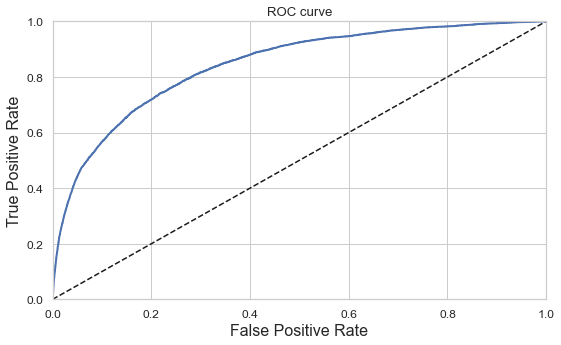

In [99]:
plot_roc_curve(y_train, y_score_lr)
save_fig('5-LogisticRegression')

In [100]:
roc_auc_score(y_train, y_score_lr)

0.8430900481187089

K-Nearest Neighbors

In [138]:
from sklearn.neighbors import KNeighborsClassifier


In [139]:
model_knn = KNeighborsClassifier()

In [143]:
y_proba_knn = cross_val_predict(model_knn, X_train_scaled, y_train, cv=5, method='predict_proba')
y_score_knn = y_proba_knn[:,1]

In [145]:
roc_auc_score(y_train, y_score_knn)

0.725139749526571

Saving figure 6-KNN


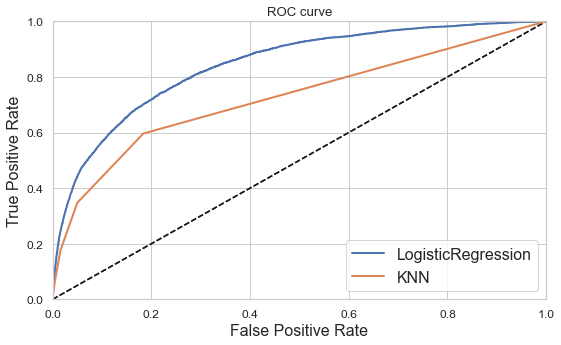

In [144]:
plot_roc_curve(y_train, y_score_lr, 'LogisticRegression')
plot_roc_curve(y_train, y_score_knn, 'KNN')
plt.legend(loc="lower right", fontsize=16)
save_fig('6-KNN')

RandomForests

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model_rfc = RandomForestClassifier(random_state=42)

In [104]:
y_proba_rfc = cross_val_predict(model_rfc, X_train_scaled, y_train, cv=5, method='predict_proba')
y_score_rfc = y_proba_rfc[:,1]

Saving figure 7-RandomForests


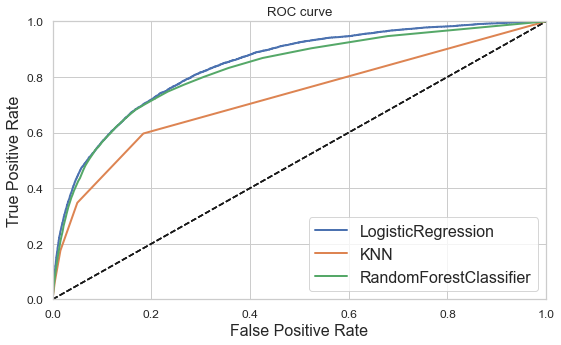

In [147]:
plot_roc_curve(y_train, y_score_lr, 'LogisticRegression')
plot_roc_curve(y_train, y_score_knn, 'KNN')
plot_roc_curve(y_train, y_score_rfc, 'RandomForestClassifier')
plt.legend(loc="lower right", fontsize=16)
save_fig('7-RandomForests')


In [106]:
roc_auc_score(y_train, y_score_rfc)

0.8267499847409676

### Optimización de hiperparámetros

In [148]:
from sklearn.model_selection import GridSearchCV

In [118]:
model_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [132]:
# Número de Decision Trees a entrenar
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=5)]
# Máxima profundidad de Decision Trees (número de nodos)
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [133]:
param_grid

{'n_estimators': [100, 325, 550, 775, 1000],
 'max_depth': [10, 32, 55, 77, 100, None]}

In [134]:
gs_rfc = GridSearchCV(estimator=model_rfc, param_grid=param_grid, scoring='roc_auc', verbose=2)

In [135]:
gs_rfc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=  10.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   9.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=   9.8s
[CV] END .....................max_depth=10, n_estimators=100; total time=   9.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=   9.7s
[CV] END .....................max_depth=10, n_estimators=325; total time=  32.5s
[CV] END .....................max_depth=10, n_estimators=325; total time=  30.9s
[CV] END .....................max_depth=10, n_estimators=325; total time=  32.6s
[CV] END .....................max_depth=10, n_estimators=325; total time=  30.8s
[CV] END .....................max_depth=10, n_estimators=325; total time=  31.7s
[CV] END .....................max_depth=10, n_estimators=550; total time=  52.5s
[CV] END .....................max_depth=10, n_e

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 32, 55, 77, 100, None],
                         'n_estimators': [100, 325, 550, 775, 1000]},
             scoring='roc_auc', verbose=2)

In [136]:
gs_rfc.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [137]:
gs_rfc.best_score_

0.8564697649493214

In [176]:
model_rfc_best = gs_rfc.best_estimator_
model_rfc_best

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

Análisis variando Max_Depth entre 3 y 9

In [164]:
# Máxima profundidad de Decision Trees (número de nodos)
max_depth = [int(x) for x in np.linspace(3, 9, num = 4)]

param_grid_2 = {
    'n_estimators': [1000],
    'max_depth': max_depth
}

In [165]:
param_grid_2

{'n_estimators': [1000], 'max_depth': [3, 5, 7, 9, None]}

In [166]:
gs_rfc_2 = GridSearchCV(estimator=model_rfc, param_grid=param_grid_2, scoring='roc_auc', verbose=2)

In [167]:
gs_rfc_2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .....................max_depth=3, n_estimators=1000; total time=  38.6s
[CV] END .....................max_depth=3, n_estimators=1000; total time=  39.2s
[CV] END .....................max_depth=3, n_estimators=1000; total time=  38.6s
[CV] END .....................max_depth=3, n_estimators=1000; total time=  40.8s
[CV] END .....................max_depth=3, n_estimators=1000; total time=  40.1s
[CV] END .....................max_depth=5, n_estimators=1000; total time=  55.7s
[CV] END .....................max_depth=5, n_estimators=1000; total time=  56.1s
[CV] END .....................max_depth=5, n_estimators=1000; total time=  56.0s
[CV] END .....................max_depth=5, n_estimators=1000; total time=  57.0s
[CV] END .....................max_depth=5, n_estimators=1000; total time=  56.6s
[CV] END .....................max_depth=7, n_estimators=1000; total time= 1.2min
[CV] END .....................max_depth=7, n_esti

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'n_estimators': [1000]},
             scoring='roc_auc', verbose=2)

In [168]:
gs_rfc_2.best_params_

{'max_depth': 9, 'n_estimators': 1000}

In [170]:
gs_rfc_2.best_score_

0.8561020347840518

Gráfico del modelo final

In [175]:
y_proba_rfc_best = cross_val_predict(model_rfc_best, X_train_scaled, y_train, cv=5, method='predict_proba')
y_score_rfc_best = y_proba_rfc_best[:,1]

Saving figure 8-RandomForests2


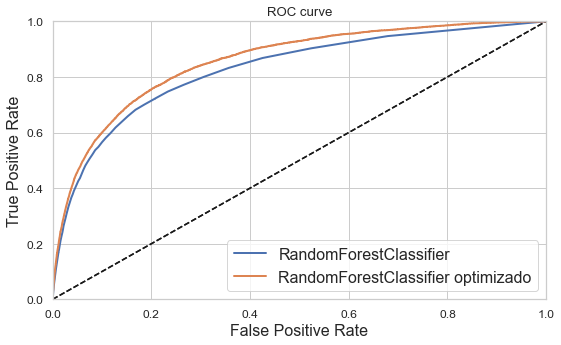

In [196]:
plot_roc_curve(y_train, y_score_rfc, 'RandomForestClassifier')
plot_roc_curve(y_train, y_score_rfc_best, 'RandomForestClassifier optimizado')
plt.legend(loc="lower right", fontsize=16)
save_fig('8-RandomForests2')

## Estimación de costos

Matriz de confusión

In [178]:
from sklearn.metrics import confusion_matrix

In [180]:
y_predict_rfc_best = cross_val_predict(model_rfc_best, X_train_scaled, y_train, cv=5)

In [185]:
cm_rfc = confusion_matrix(y_train, y_predict_rfc_best)

In [226]:
cm_rfc

array([[99245,   601],
       [ 6017,   861]], dtype=int64)

Saving figure 9-ConfusionMatrix


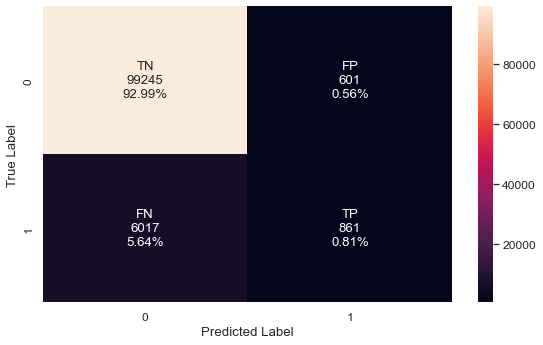

In [197]:
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cm_rfc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_rfc.flatten()/np.sum(cm_rfc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plot = sns.heatmap(cm_rfc, annot=labels, fmt='')
plot.set(xlabel='Predicted Label', ylabel='True Label')
save_fig('9-ConfusionMatrix')

In [242]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [243]:
precision = precision_score(y_train, y_predict_rfc_best)
recall = recall_score(y_train, y_predict_rfc_best)
accuracy = accuracy_score(y_train, y_predict_rfc_best)
f1 = f1_score(y_train, y_predict_rfc_best)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1:", f1)

Precision: 0.5889192886456909
Recall: 0.1251817388775807
Accuracy: 0.9379895806004273
F1: 0.20647482014388488


Nuevo threshold: 0.08

In [234]:
y_predict_rfc_best_new = (y_score_rfc_best > 0.08).astype(int)

In [235]:
cm_rfc_new = confusion_matrix(y_train, y_predict_rfc_best_new)

Saving figure 10-ConfusionMatrix2


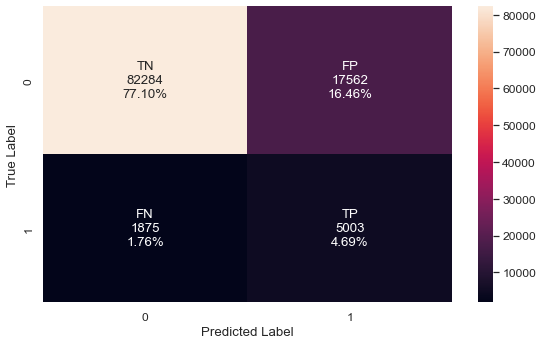

In [236]:
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cm_rfc_new.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_rfc_new.flatten()/np.sum(cm_rfc_new)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plot = sns.heatmap(cm_rfc_new, annot=labels, fmt='')
plot.set(xlabel='Predicted Label', ylabel='True Label')
save_fig('10-ConfusionMatrix2')

In [244]:
precision_new = precision_score(y_train, y_predict_rfc_best_new)
recall_new = recall_score(y_train, y_predict_rfc_best_new)
accuracy_new = accuracy_score(y_train, y_predict_rfc_best_new)
f1_new = f1_score(y_train, y_predict_rfc_best_new)
print("Precision:", precision_new)
print("Recall:", recall_new)
print("Accuracy:", accuracy_new)
print("F1:", f1_new)

Precision: 0.2217150454243297
Recall: 0.7273916836289619
Accuracy: 0.8178760166410555
F1: 0.33984308664198615


## Evaluación final

Se entrena el modelo final con el train set completo y se evalua utilizando el test set

In [247]:
final_model = RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [248]:
X_test_scaled = scaler.transform(X_test)

In [255]:
y_test_predict_proba = final_model.predict_proba(X_test_scaled)
y_score_test = y_test_predict_proba[:,1]

In [257]:
y_predict_test = (y_score_test > 0.08).astype(int)

Saving figure 11-ConfusionMatrix3


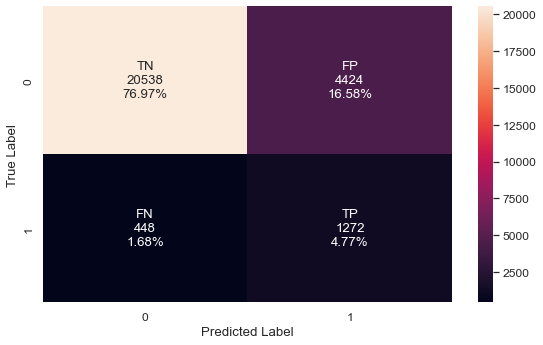

In [260]:
cm_rfc_test = confusion_matrix(y_test, y_predict_test)

group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cm_rfc_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_rfc_test.flatten()/np.sum(cm_rfc_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plot = sns.heatmap(cm_rfc_test, annot=labels, fmt='')
plot.set(xlabel='Predicted Label', ylabel='True Label')
save_fig('11-ConfusionMatrix3')

In [259]:
precision_test = precision_score(y_test, y_predict_test)
recall_test = recall_score(y_test, y_predict_test)
accuracy_test = accuracy_score(y_test, y_predict_test)
f1_test = f1_score(y_test, y_predict_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("Accuracy:", accuracy_test)
print("F1:", f1_test)

Precision: 0.22331460674157302
Recall: 0.7395348837209302
Accuracy: 0.8174049921295256
F1: 0.34304207119741104
